# EDA to Explore imbalance Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
class_count = pd.value_counts(df['Class'])
class_count

0    284315
1       492
Name: Class, dtype: int64

# Imbalanced Dataset

The number of Fraudulent transactions is only 492 out of a total of 284807 transactions.
To ensure that there is no information leakage, we will have to under or oversample the training data

([<matplotlib.axis.XTick at 0x1c3a35f5408>,
 <a list of 2 Text xticklabel objects>)

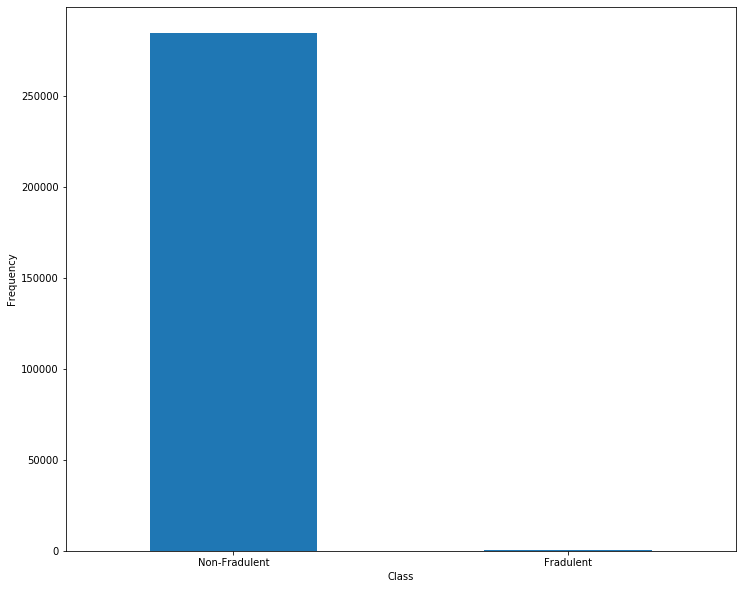

In [6]:
class_count.plot(kind='bar',rot=0,figsize=(12,10))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(range(2),['Non-Fradulent', 'Fradulent'])

#This is a highly imbalanced dataset as there are 284315 'Non-Fraudulent' credits card transactions vs 492 'Fraudulent' ones

# Does Amount matter?

Taking a closer look at the 'Amount' column.

We see that the Fraudulent transactions have a higher average amount involved than the Non-Fraudulent transactions.
Interestingly, there is a higher porpotion of Fradulent transactions with 0 amount as compared to non 0 amount

In [67]:
average_nonfraud_amount = df[df['Class']==0]['Amount'].mean()
average_fraud_amount = df[df['Class']==1]['Amount'].mean()

#Get the average transaction amount for Non-Fraudulent transactions
print('The average Amount for Non-Fraudulent transactions: $'+ str("{:.2f}".format(average_nonfraud_amount)))
#Get the average transaction amount for Fraudulent transactions
print('The average Amount for Fraudulent transactions: $'+ str("{:.2f}".format(average_fraud_amount)))

The average Amount for Non-Fraudulent transactions: $88.29
The average Amount for Fraudulent transactions: $122.21


In [68]:
#Proportion of Fraudulent transactions when Amount = 0
percent_amt_0_fraud = (df[(df['Class']==1) & (df['Amount']==0)].shape[0])/(df[df['Amount']==0]).shape[0]*100
print('The percentage of Fraudulent transactions when Amount = $0 is: '+ str("{:.2f}".format(percent_amt_0_fraud)+ '%'))

#Proportion of Fraudulent transactions when Amount is Non 0
percent_amt_Non_0_fraud = (df[(df['Class']==1) & (df['Amount']!=0)].shape[0])/(df[df['Amount']!=0]).shape[0]*100
print('The percentage of Fraudulent transactions when Amount is Non $0 is: '+ str("{:.4f}".format(percent_amt_Non_0_fraud)+ '%'))

The percentage of Fraudulent transactions when Amount = $0 is: 1.48%
The percentage of Fraudulent transactions when Amount is Non $0 is: 0.1643%


Taking another look at the average Amount after removing transactions with Amount = $0

In [70]:
average_nonfraud_non_0_amount = df[(df['Class']==0) & (df['Amount']!=0)]['Amount'].mean()
average_fraud_non_0_amount = df[(df['Class']==1) & (df['Amount']!=0)]['Amount'].mean()

#Get the average transaction amount for Non-Fraudulent transactions
print('The average Amount for Non-Fraudulent transactions: $'+ str("{:.2f}".format(average_nonfraud_non_0_amount)))
#Get the average transaction amount for Fraudulent transactions
print('The average Amount for Fraudulent transactions: $'+ str("{:.2f}".format(average_fraud_non_0_amount)))

The average Amount for Non-Fraudulent transactions: $88.85
The average Amount for Fraudulent transactions: $129.31


In [94]:
#Proportion of Fradulent transactions with $0 Amount
print('Proportion of Fradulent transactions with $0 Amount: '+ str("{:.2f}".format((df[(df['Class']==1) & (df['Amount']==0)].shape[0])/df[df['Class']==1].shape[0]*100))+ '%')

Proportion of Fradulent transactions with $0 Amount: 5.49%
